# End-to-End Cars Price Prediction System

## Import required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
import sklearn



Matplotlib is building the font cache; this may take a moment.


## Import dataset and have a peek at it 👀

In [2]:
cars_data = pd.read_csv("Car_details_2.csv")
# https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho

In [3]:
cars_data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [4]:
cars_data.shape

(8128, 13)

## Drop duplicate entries in the dataset

In [5]:
cars_data.drop_duplicates(inplace=True)
cars_data.reset_index(inplace=True)
cars_data.drop(["index"],axis=1,inplace=True)
cars_data.isnull().sum()


name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          208
engine           208
max_power        205
torque           209
seats            208
dtype: int64

## Data Cleaning

In [6]:
 #Few mileage values are in km/kg units instead of kmpl
cars_data["mileage"] = cars_data["mileage"].str.replace("km/kg","kmpl")
cars_data["mileage"] = cars_data["mileage"].str.rstrip(" kmpl")
cars_data["mileage"] = cars_data["mileage"].astype("float")
cars_data["mileage"].fillna(value=np.mean(cars_data["mileage"]),inplace=True)


In [7]:
cars_data.engine = cars_data.engine.str.rstrip(" CC")
cars_data.max_power = cars_data.max_power.str.rstrip(" bhp")
cars_data.dropna(axis=0,inplace=True)

cars_data.engine = cars_data.engine.astype('int64')
cars_data.seats = cars_data.seats.astype('int64')
cars_data.max_power = cars_data.max_power.astype('float64')
cars_data.drop(["torque","name"],axis=1,inplace=True)
print(cars_data.shape)
cars_data

(6717, 11)


,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,5
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5
...,...,...,...,...,...,...,...,...,...,...,...
6921,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998,67.10,5
6922,2014,475000,80000,Diesel,Individual,Manual,Second Owner,22.54,1396,88.73,5
6923,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197,82.85,5
6924,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493,110.00,5


In [8]:
# Convert years to number of years for easier use
cars_data["no_of_yrs"] = 2020 - cars_data["year"]

#only 5 cars are Test Drive Cars and can be removed for more accuracy
cars_data.drop(cars_data[cars_data["owner"]=='Test Drive Car'].index,inplace=True)
cars_data.owner.unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner'], dtype=object)

In [9]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6712 entries, 0 to 6925
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           6712 non-null   int64  
 1   selling_price  6712 non-null   int64  
 2   km_driven      6712 non-null   int64  
 3   fuel           6712 non-null   object 
 4   seller_type    6712 non-null   object 
 5   transmission   6712 non-null   object 
 6   owner          6712 non-null   object 
 7   mileage        6712 non-null   float64
 8   engine         6712 non-null   int64  
 9   max_power      6712 non-null   float64
 10  seats          6712 non-null   int64  
 11  no_of_yrs      6712 non-null   int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 681.7+ KB


## Exploratory Data Analysis (EDA) to understand more about the data

<AxesSubplot:>

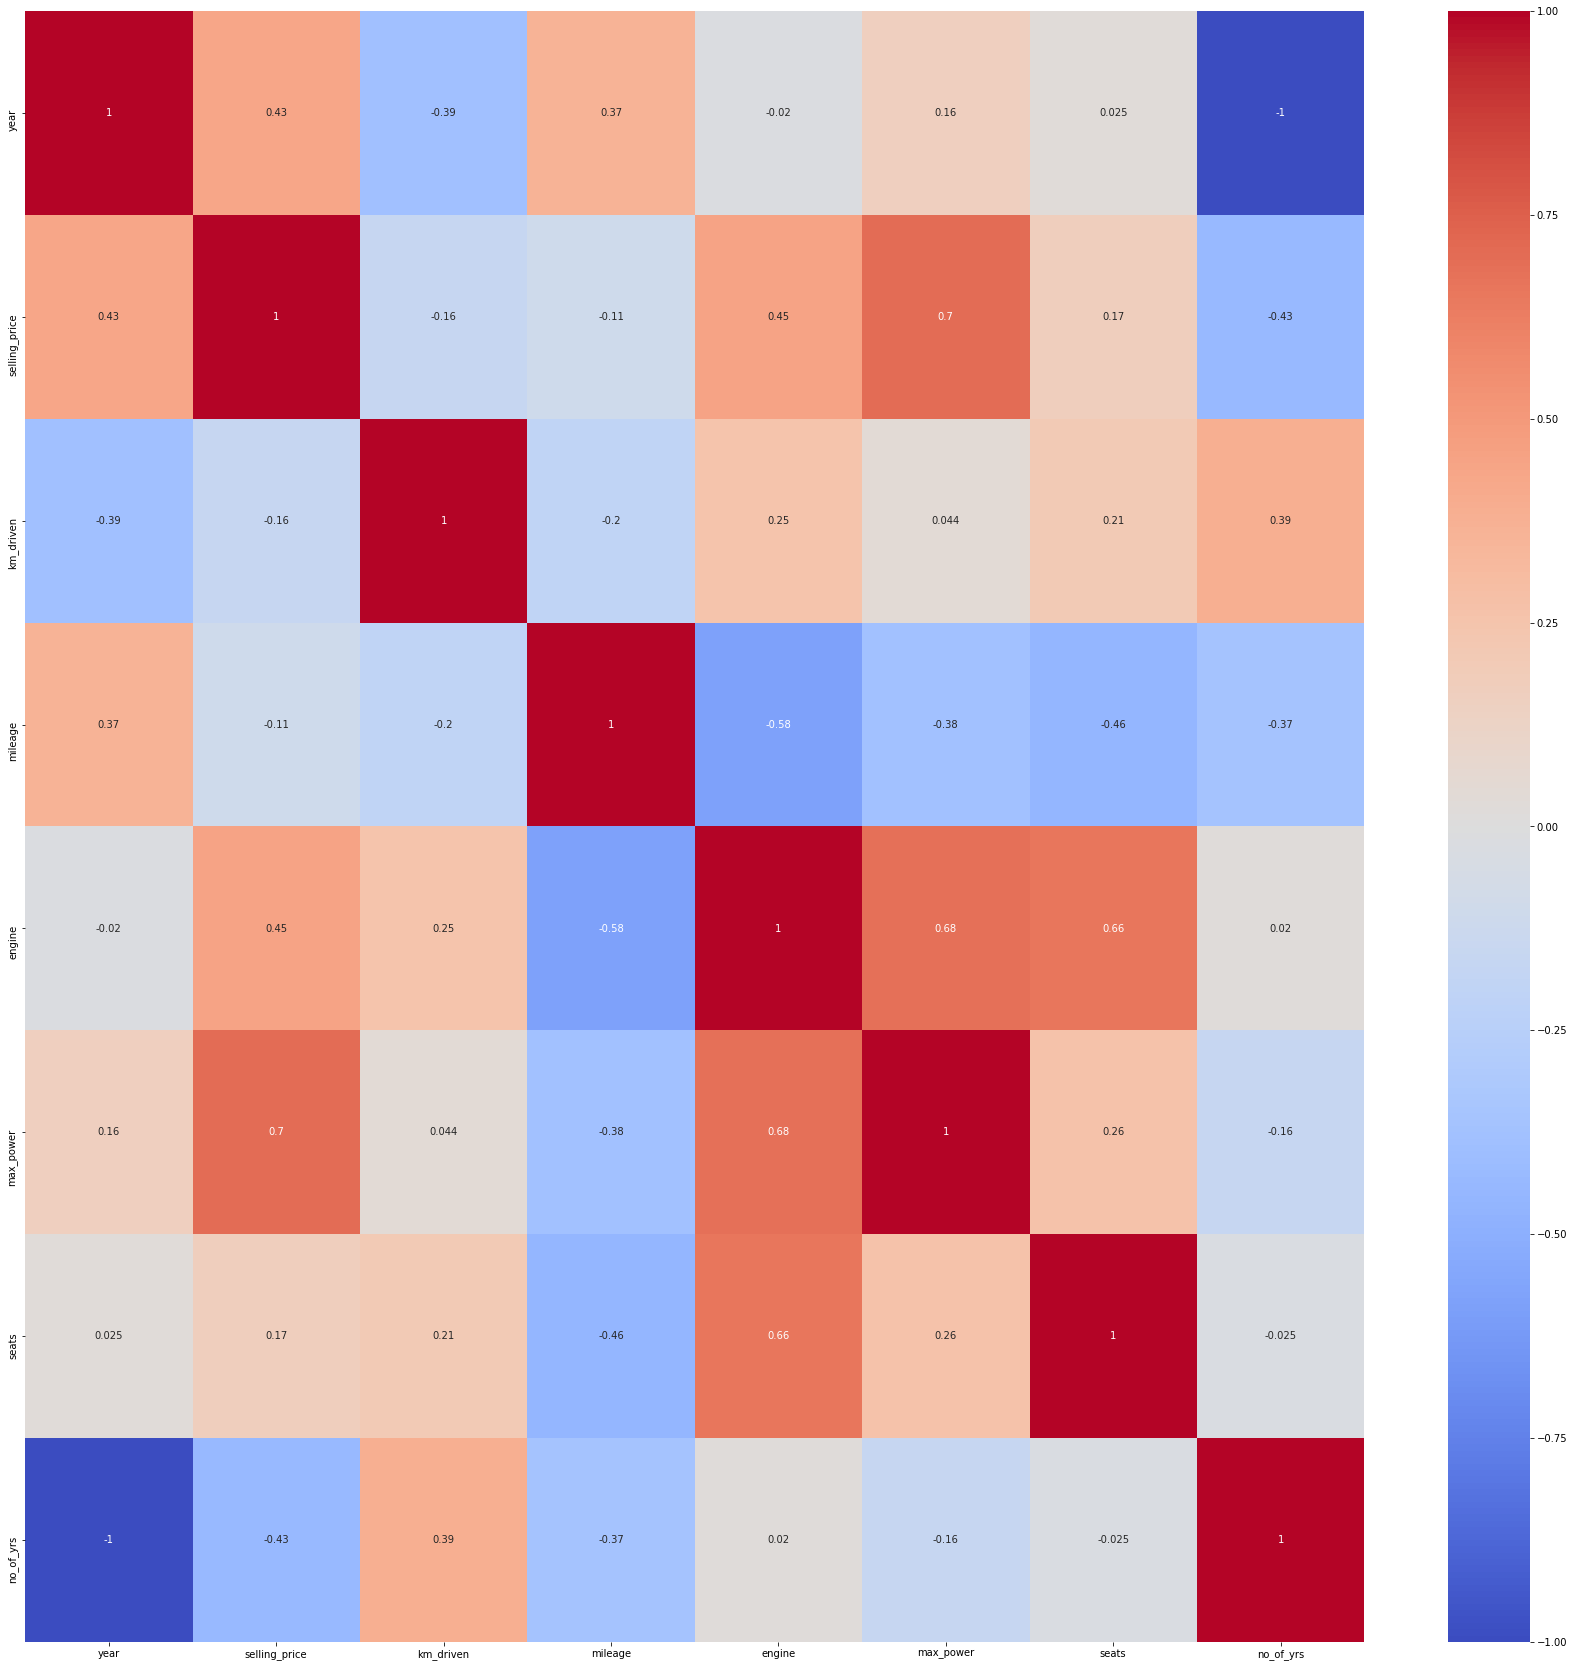

In [10]:
fig, ax = plt.subplots(figsize=(30,30))
sns.heatmap(cars_data.corr(),annot=True,cmap="coolwarm",fmt=".2g",ax=ax)

<AxesSubplot:xlabel='seller_type', ylabel='selling_price'>

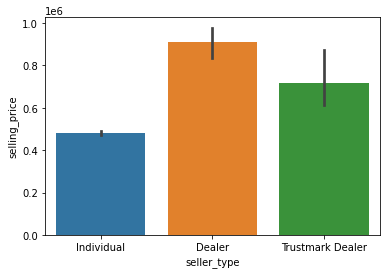

In [11]:
sns.barplot(x="seller_type",y="selling_price",data=cars_data)

#### Cars sold by dealers have a higher selling price than that of Individuals

<AxesSubplot:xlabel='no_of_yrs', ylabel='selling_price'>

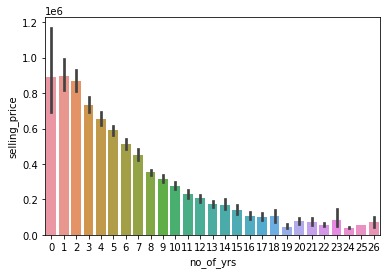

In [12]:
sns.barplot(y='selling_price',x="no_of_yrs",data=cars_data)

#### The selling price of the car decreases as the car gets older.

<AxesSubplot:xlabel='km_driven', ylabel='selling_price'>

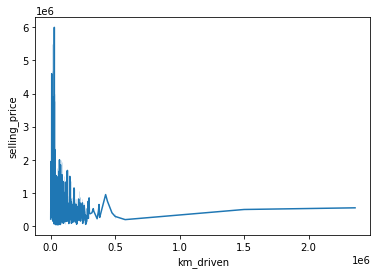

In [13]:
sns.lineplot(y="selling_price",x="km_driven",data=cars_data)

#### Unsurprisingly, the car cost decreases as the no of kms driven increases over 500,000kms

<AxesSubplot:xlabel='owner', ylabel='selling_price'>

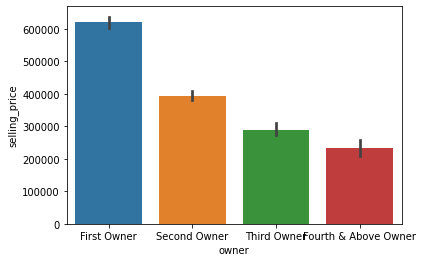

In [14]:
sns.barplot(x="owner",y="selling_price",data=cars_data)

### The selling price decreases as the number of owners increase

In [15]:
owner_count={"First" : len(cars_data[cars_data["owner"]=="First Owner"]),
            "Second" : len(cars_data[cars_data["owner"]=="Second Owner"]),
            "Third" : len(cars_data[cars_data["owner"]=="Third Owner"]),
            "Fourth and Above" : len(cars_data[cars_data["owner"]=="Fourth & Above Owner"])}

owner_count

{'First': 4176, 'Second': 1888, 'Third': 493, 'Fourth and Above': 155}

### There are only 155 records of cars previously owned by four or more owners out of 6172 cars. Which is around 2.5% of the total dataset. These records can be dropped to improve accuracy of the model.

In [16]:
cars_data.drop(cars_data[cars_data["owner"]=="Fourth & Above Owner"].index,inplace=True)
cars_data


,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,no_of_yrs
0,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5,6
1,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5,6
2,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497,78.00,5,14
3,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5,10
4,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5,13
...,...,...,...,...,...,...,...,...,...,...,...,...
6920,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92,1086,62.10,5,12
6921,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998,67.10,5,7
6922,2014,475000,80000,Diesel,Individual,Manual,Second Owner,22.54,1396,88.73,5,6
6923,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197,82.85,5,7


## Choose only those features which are of importance

In [17]:
# cars_data
final_dataset = cars_data[['selling_price', 'km_driven', 'fuel', 'seller_type','transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats','no_of_yrs']]
cars_data.seller_type.unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [18]:
final_dataset = pd.get_dummies(final_dataset,drop_first=True)
final_dataset

,selling_price,km_driven,mileage,engine,max_power,seats,no_of_yrs,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual,owner_Second Owner,owner_Third Owner
0,450000,145500,23.40,1248,74.00,5,6,1,0,0,1,0,1,0,0
1,370000,120000,21.14,1498,103.52,5,6,1,0,0,1,0,1,1,0
2,158000,140000,17.70,1497,78.00,5,14,0,0,1,1,0,1,0,1
3,225000,127000,23.00,1396,90.00,5,10,1,0,0,1,0,1,0,0
4,130000,120000,16.10,1298,88.20,5,13,0,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6920,120000,191000,17.92,1086,62.10,5,12,0,0,1,1,0,1,0,0
6921,260000,50000,18.90,998,67.10,5,7,0,0,1,1,0,1,1,0
6922,475000,80000,22.54,1396,88.73,5,6,1,0,0,1,0,1,1,0
6923,320000,110000,18.50,1197,82.85,5,7,0,0,1,1,0,1,0,0


In [19]:
X = final_dataset.iloc[:,1:]
Y = final_dataset.iloc[:,0]


In [20]:
###Feature Importance
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,Y)


ExtraTreesRegressor()

In [21]:
X.columns
final_dataset.shape

(6557, 15)

In [22]:
print(model.feature_importances_)

[4.72846154e-02 4.22382734e-02 6.58911106e-02 3.51168997e-01
 2.27015101e-02 2.19210528e-01 3.95909158e-02 1.87312135e-05
 2.17380270e-02 8.94334686e-03 9.71064409e-05 1.65590326e-01
 1.28906976e-02 2.63581532e-03]


<AxesSubplot:>

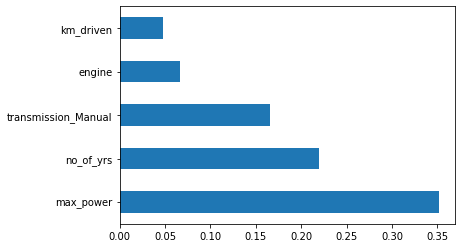

In [23]:
feat_importance = pd.Series(model.feature_importances_,index=X.columns)
feat_importance.nlargest(5).plot(kind='barh')

## Splitting the dataset into training and testing set. Applying XGBoost and Random Forest Algorithm on the dataset

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [25]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor


# rf = RandomForestRegressor(n_estimators = 10, random_state = 0)
xgboost = XGBRegressor()
randomf = RandomForestRegressor()
xgboost.fit(X_train,Y_train)
randomf.fit(X_train,Y_train)

RandomForestRegressor()

# Accuracy and evaluation metrics

In [26]:
predictions_xg = xgboost.predict(X_test)
predictions = randomf.predict(X_test)
print(" Accuracy obtained using random forest : ",randomf.score(X_test,Y_test))
print(" Accuracy obtained using XGBoost : ",xgboost.score(X_test,Y_test))

 Accuracy obtained using random forest :  0.87056452035254
 Accuracy obtained using XGBoost :  0.878015024690816


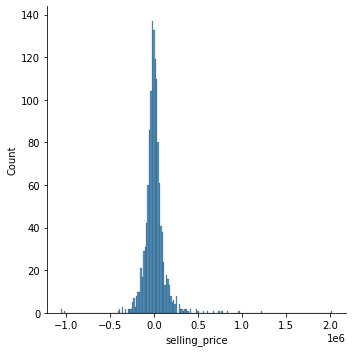

In [27]:
sns.displot(Y_test-predictions) #rf
sns.displot(Y_test-predictions_xg) #xg

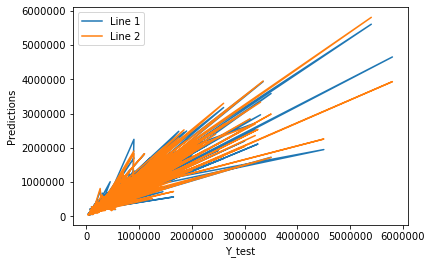

In [ ]:

plt.plot(Y_test,predictions,label="Line 1")
plt.plot(Y_test,predictions_xg,label="Line 2")
plt.xlabel("Y_test")
plt.ylabel("Predictions")
plt.legend()
plt.show()


Text(0.5, 1.0, ' Actual Prices vs Predicted Prices')

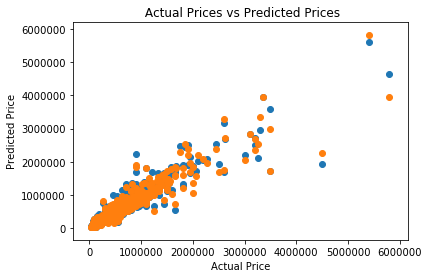

In [ ]:
plt.scatter(Y_test,predictions)
plt.scatter(Y_test,predictions_xg)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")

In [ ]:
file = open("XGBoost_regression_model.pkl","wb")
pickle.dump(xgboost,file)


In [ ]:
from sklearn import metrics

print("\t\tError Table(XG)")
print('Mean Absolute Error      : ', metrics.mean_absolute_error(Y_test, predictions_xg))
print('Mean Squared  Error      : ', metrics.mean_squared_error(Y_test, predictions_xg))
print('Root Mean Squared  Error : ', np.sqrt(metrics.mean_squared_error(Y_test, predictions_xg)))


print('R^2 Error          : ', metrics.r2_score(Y_test, predictions_xg))

print("\t\tError Table(RF)")
print('Mean Absolute Error      : ', metrics.mean_absolute_error(Y_test, predictions))
print('Mean Squared  Error      : ', metrics.mean_squared_error(Y_test, predictions))
print('Root Mean Squared  Error : ', np.sqrt(metrics.mean_squared_error(Y_test, predictions)))

print('R^2  Error          : ', metrics.r2_score(Y_test, predictions))

print("Adjusted R^2 score", 1 - (1-model.score(X, Y))*(len(Y)-1)/(len(Y)-X.shape[1]-1))



		Error Table(XG)
Mean Absolute Error      :  78289.18151260004
Mean Squared  Error      :  26178732842.623848
Root Mean Squared  Error :  161798.4327570074
R^2 Error          :  0.8853557341180873
		Error Table(RF)
Mean Absolute Error      :  78896.36630474028
Mean Squared  Error      :  26265624413.983376
Root Mean Squared  Error :  162066.72827568086
R^2  Error          :  0.8849752107188179
Adjusted R^2 score 0.9989479480316033
